# Assignment 3: Bootstrap, confidence intervals & standard errors

## Learning Outcomes:
In this homework we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Preliminaries
Set up the environment by importing pandas, numpy, scipy, and matplotlib. 

In [225]:
import pandas as pd
import numpy as np
import scipy as ss
import matplotlib.pyplot as plt 
import seaborn as sns

On some installations, you may still have to configure your notebook such that plots are shown inline (see Assignment 2). 

In [226]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline


## Task 1: Analyzing a sample from the  population (12pt)
In this task you will use the sample of runners that you got. 
### Question 1 (4pt)
What was the mean finishing time in the random sample?

In [227]:
# load in sample data
df = pd.read_csv("run10sample.csv")
df.head

# sample mean time
np.mean(df["time"])

98.1504

### Question 2 (4pt)
What is the number of men and women in your sample (tip: use groupby and size or count)?

In [228]:
df.groupby(df["gender"]).size()


gender
F    14
M    11
dtype: int64

### Question 3 (4pt)
What was the mean finishing time when you split the sample up by gender (see Homework 2, task 4)? 

In [229]:
df["time"].groupby(df["gender"]).mean()

gender
F    103.496429
M     91.346364
Name: time, dtype: float64

## Task 2: Resampling from the population (47 Points)
In this task you will have access to the data from the whole population to determine how much confidence you should have in the numbers you obained in Task 1.The dataset run10.csv contain the total population of 16923 competitors in the 2012 Cherry blossom run (cherryblossom.org). Having the whole population gives us the opportunity to check how good our sample estimate is. 

### Question 1 (10pt)

What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1? Can this difference be explained by the fact that our sample differs from the population in terms of gender distribution? How about age? Knowing these differences, how could we have improved our estimate?

In [230]:
# load in population data
df2 = pd.read_csv("run10.csv")
df2.head

<bound method NDFrame.head of        place    time    pace   age gender             location state  \
0       4494   92.25   9.225  38.0      M  Chesapeake Beach MD    MD   
1       6298  106.35  10.635  33.0      M        Washington DC    DC   
2       2502   89.33   8.933  55.0      F            McLean VA    VA   
3       8176  113.50  11.350  24.0      F        Alexandria VA    VA   
4       3413   86.52   8.652  54.0      M     San Francisco CA    CA   
...      ...     ...     ...   ...    ...                  ...   ...   
16918    329   64.45   6.445  32.0      M         Arlington VA    VA   
16919   4475   96.83   9.683  36.0      F          Carlisle PA    PA   
16920   6243  103.30  10.330  30.0      F        Washington DC    DC   
16921   9133  122.87  12.287  37.0      F            Reston VA    VA   
16922   3462   93.30   9.330  27.0      F        Washington DC    DC   

       divPlace  divTot  
0         690.0  1093.0  
1        1322.0  1490.0  
2          37.0   236.0  
3

In [231]:
# population mean time
np.mean(df2["time"])

94.51597470897607

In [232]:
# difference between sample and population means
np.mean(df["time"])-np.mean(df2["time"])

3.6344252910239305

The sample mean finishing time is slightly greater than the population finishing time. Assuming a completely random sampling was made to acquire the sample data, the ratio of males to females in the sample should be similar enough to the population that it should be negligible, however it cannot be ruled out as a potential influencing factor without further statistical analysis. The collected sample may have included slightly more extreme units. That may have been caused by various factors including gender and age. Taking a larger sample is recommended as it would be closer to a sampling of the whole population and further mitigate other factors. Bootstrapping can also be conducted to help find a confidence interval to calculate the significance of the extent to which the sample varies from the population parameters.

### Question 2 (10pt)
Write a function **bootstrap**, which takes a data series (data) as an input and then performs a bootstrap. The function should take numIter samples from the data (with replacement) of size N. It should then calculate the statistics defined in fcn for each iteration and record it in a numpy-array, which it should then return.

Input arguments 
- data: data series to resample
- N: Sample size for each iteration 
- fcn: function to apply to the sample to get the statistics
- numIter: Number of resamples (should default to 1000) 

Output argument: 
- Numpy array of size numIter that contains the estimates of the statistics (i.e. the bootstrap sample)


In [233]:
# bootstrap function
def bootstrap(data, N, fcn, numIter = 1000):
    
    # initialize numpy array
    boot_stats = np.zeros(numIter)
    np.random.seed(0)
    
    # take sample of size N and calculate statistic on sample, repeat numIter amount of times
    for i in range(numIter):
        d = np.random.choice(data, size = N, replace = True)
        boot_stats[i] = fcn(d)
    
    # returns sample statistics
    return boot_stats

# test bootstrap function
# values = bootstrap(data = df2["time"], N = 20, fcn = np.mean)
# len(values) # so each point is a mean of a N = 25 sample, there's 1000 sample means
# values

### Question 3 (8pt)
Call the resample (bootstrap) function from Question 2 with time from the whole population as the data series, mean as the statistic, and a sample size of 25. Plot a histogram of the samples – make sure your x-axis and y-axis are labeled and a caption added. Report the mean and the standard deviation of the resampled estimates. 

C:\1-School\Year3\DS\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


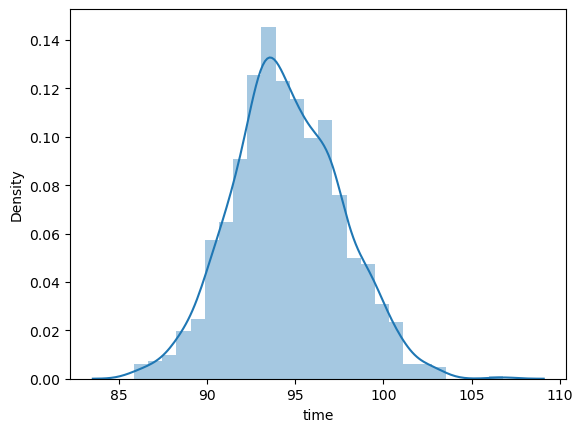

The mean is 94.538
The standard deviation is 3.071


In [234]:
# bootstrap, N = 25
values_25 = bootstrap(data = df2["time"], N = 25, fcn = np.mean)

# histogram
graph = sns.distplot(values_25)
graph.set(xlabel = "time")

plt.show()

# mean and sd of resampled estimates, respectively (samples mean)
print("The mean is %.3f" %np.mean(values_25))
print("The standard deviation is %.3f" %np.std(values_25))

Figure 1. Distribution of time sample means from bootstrap.

### Question 4 (8pt)
Call your bootstrap function again as in question 3, this time increasing the sample size first to 50, and then to 100. Which of the values (mean, standard deviation) of the means distribution changes most and why? 

In [235]:
# sample size N = 50
values_50 = bootstrap(data = df2["time"], N = 50, fcn = np.mean)

# mean and sd of resampled estimates, respectively (samples mean)
print("The mean is %.3f for N = 50" %np.mean(values_50))
print("The standard deviation is %.3f for N = 50" %np.std(values_50))

# sample size N = 100
values_100 = bootstrap(data = df2["time"], N = 100, fcn = np.mean)

# mean and sd of resampled estimates, respectively (samples mean)
print("The mean is %.3f for N = 100" %np.mean(values_100))
print("The standard deviation is %.3f for N = 100" %np.std(values_100))

The mean is 94.487 for N = 50
The standard deviation is 2.287 for N = 50
The mean is 94.479 for N = 100
The standard deviation is 1.634 for N = 100


Standard deviation decreased as sample size increased. This is because of the Central Limit Theorem, and as more samples are taken, the closer to the population mean the samples mean gets. With more points between the same range, the distance between each point decreases, and so standard deviation decreases. The increase in sample size also decreases standard error, as per the formula for SE = delta/sqrt(N), where delta = standard deviation, N = sample size, which makes sense since the sample size is closer to the population size.

### Question 5 (6pt)
Calculate the predicted standard error of the mean from the population standard deviation and the same size for  N=25, N=50, and N=100. Write a line of code for each sample size that prints the answer in a full sentence. Written answer: Do these match up with the SEMs that you got from question 4? 

In [236]:
# predicted SEM = population SD/N, N = 25
se_25 = np.std(df2["time"])/np.sqrt(25)
print("Predicted standard error of the mean for N=25 is %.3f" %se_25 )

# predicted SEM = population SD/N, N = 50
se_50 = np.std(df2["time"])/np.sqrt(50)
print("Predicted standard error of the mean for N=25 is %.3f" %se_50 )

# predicted SEM = population SD/N, N = 100
se_100 = np.std(df2["time"])/np.sqrt(100)
print("Predicted standard error of the mean for N=25 is %.3f" %se_100 )

Predicted standard error of the mean for N=25 is 3.184
Predicted standard error of the mean for N=25 is 2.252
Predicted standard error of the mean for N=25 is 1.592


The trend of decreasing standard error with increasing sample size is consistent.

## Task 3: Calculating confidence intervals (24pt) 
### Question 1 (8pt)
Write a function (confidenceInt) that constructs a confidence interval from a bootstrap sample using the percentile bootstrap method (see lecture). 	

Input arguments 
- data: Sample of estimates – usually this is output from “bootstrap” (resample function from task 3 Q2)
- prec: What Confidence interval in percent? 95= 95% confidence interval <br/>
Output argument: 
- A list with 2 values: the lower and upper bound of the interval. 

Tip: Use np.percentile to get a specific percentile of the data. The lower bound of a 95% confidence interval is the (100-95)/2=2.5 percentile. 

In [237]:
def confidenceInt(data, prec):
    # initialize list for confidecne interval
    CI = []
    
    # percentile bootstrap method
    lower = np.percentile(data, (100 - prec)/2)
    upper = np.percentile(data, prec)
    
    # round to 3 decimals and add to list CI
    CI.append(round(lower, 3))
    CI.append(round(upper, 3))
    
    print(CI)

### Question 2 (8pt)
Determine the confidence 95% interval for the mean estimate of your sample of 25. Use your bootstrap function (resample from Task 3 Q2) above to generate 1000 artificial samples of 25. Then use your confidenceInt function to get the 95% confidence interval.  Report the interval. 


In [238]:
# bootstrap for N = 25
values_25 = bootstrap(data = df2["time"], N = 25, fcn = np.mean)

# getting 95% confidence interval
confidenceInt(data = values_25, prec = 95)

[88.652, 99.683]


### Question 3  (8pt)
Repeat the plotting of the histogram from task 2.3 – but this time plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline. Make sure that the graph has x- and y-labels and a caption.

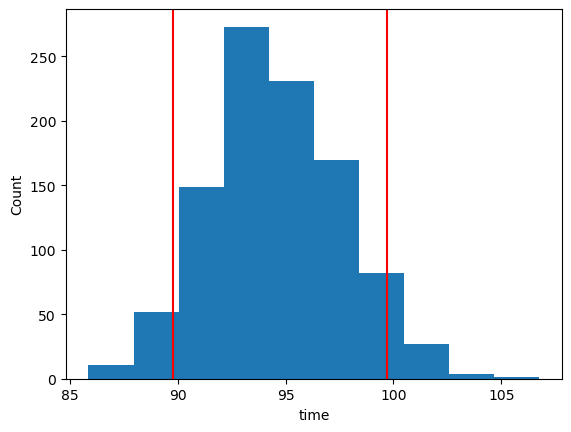

In [239]:
# bootstrap for N = 25
values_25 = bootstrap(data = df2["time"], N = 25, fcn = np.mean)

# plot histogram with 95% confidence interval and axes labels
plt.hist(values_25)
plt.axvline(x = np.percentile(values_25, q = 95), color = "r")
plt.axvline(x = np.percentile(values_25, q = 5), color = "r")
plt.xlabel("time")
plt.ylabel("Count")

plt.show()

Figure 2. Distribution of time sample means from bootstrap with 95% confidence interval (lower bound = 88.652, upper bound = 99.683).

## Task 4: Bootstraping from the sample (22pt)
Now let's forget that you ever had the data from the whole population. Say, you only have your initial sample of 25 participants. How would you get an estimate of the confidence interval of the mean of the sample? 
### Question 1 (8pt)
Load the sample stored in run10sample.csv. Now call the resample function with that time data, in each loop resampling 25 data points from 25 data points (with replacement!). You have now taken 1000 bootstrap samples. Report the mean of the bootstrap samples, the standard deviation of the the samples, and the 95% confidence interval.

In [240]:
# load in sample data set
df = pd.read_csv("run10sample.csv")

# resample df, N = 25, for mean time
values = bootstrap(data = df["time"], N = 25, fcn = np.mean)

# mean, sd, and 95% confidence interval of 1000 bootstrap samples
print("The mean is %.3f" %np.mean(values))
print("The standard deviation is %.3f" %np.std(values))
print("The 95% confidence interval is:")
confidenceInt(data = values, prec = 95)

The mean is 98.222
The standard deviation is 2.756
The 95% confidence interval is:
[92.988, 102.668]


### Question 2 (8pt)
Plot of the histogram of your bootstrap samples –plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline (see homework 3). Plot the true population mean (Task 2.1) as a red vertical line. Make sure that the graph has x- and y-labels and caption saying what the different lines mean. 

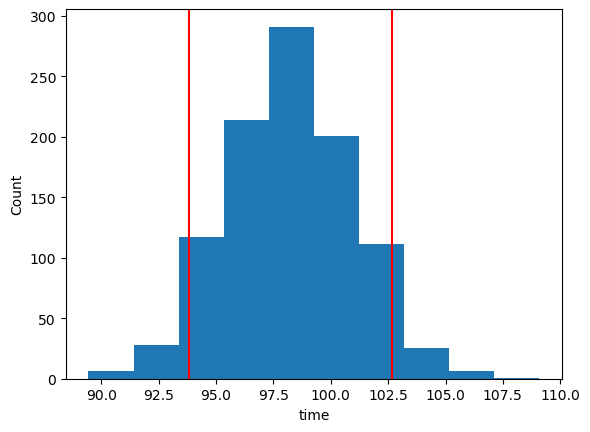

In [241]:
# resample df, N = 25, for mean time
values = bootstrap(data = df["time"], N = 25, fcn = np.mean)

# plot histogram with 95% confidence interval and axes labels
plt.hist(values)
plt.axvline(x = np.percentile(values, q = 95), color = "r")
plt.axvline(x = np.percentile(values, q = 5), color = "r")
plt.xlabel("time")
plt.ylabel("Count")

plt.show()

Figure 3. Distribution of 1000 bootstrap samples means for time with 95% confidence interval (lower bound = 92.988, upper bound = 102.668).

### Question 3: (6pt)
Written answer: Does the 95% confidence interval include the true population mean? Does it include the mean value from last year’s cherry blossom run (101min)? Is there statistical evidence from your sample of N=25, that the race times have gotten faster from last year? 

The true population mean time (94.5 min) is within the 95% confidence interval. The mean value from last year's cherry blossom run (101 min) is also included in this interval. Therefore, there is evidence that this sample is a reliable estimate for the population mean, but there is no evidence that race times have gotten significantly faster from last year since it is within the confidence interval, and it has actually decreased to 98 min this year.